# Ploynomail Regression:

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

### Read Data set

In [2]:
data_set=pd.read_csv("salary data prediction .csv")
data_set.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,24.0,Male,Bachelor's,Sales Representative,3.0,30000.0
1,25.0,Female,Bachelor's,Data Entry Clerk,3.0,35000.0
2,25.0,Male,Bachelor's,Help Desk Analyst,3.0,35000.0
3,26.0,Male,Bachelor's,Junior Accountant,4.0,35000.0
4,26.0,Male,Bachelor's,Junior Software Developer,4.0,35000.0


In [3]:
data_set.shape

(2551, 6)

### Remove Duplicates rows

In [4]:
data_set1=data_set.drop_duplicates()

In [5]:
data_set1.shape

(2547, 6)

In [6]:
data_set1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2547 entries, 0 to 2550
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2536 non-null   float64
 1   Gender               2534 non-null   object 
 2   Education Level      2533 non-null   object 
 3   Job Title            2534 non-null   object 
 4   Years of Experience  2545 non-null   float64
 5   Salary               2534 non-null   float64
dtypes: float64(3), object(3)
memory usage: 139.3+ KB


In [7]:
data_set1.isnull().sum()

Age                    11
Gender                 13
Education Level        14
Job Title              13
Years of Experience     2
Salary                 13
dtype: int64

### Remove nulls values

In [8]:
data_set1.dropna()
data_set1.fillna(data_set1.mean(), inplace=True)


## Visualization and Statistics about dataset

<Axes: >

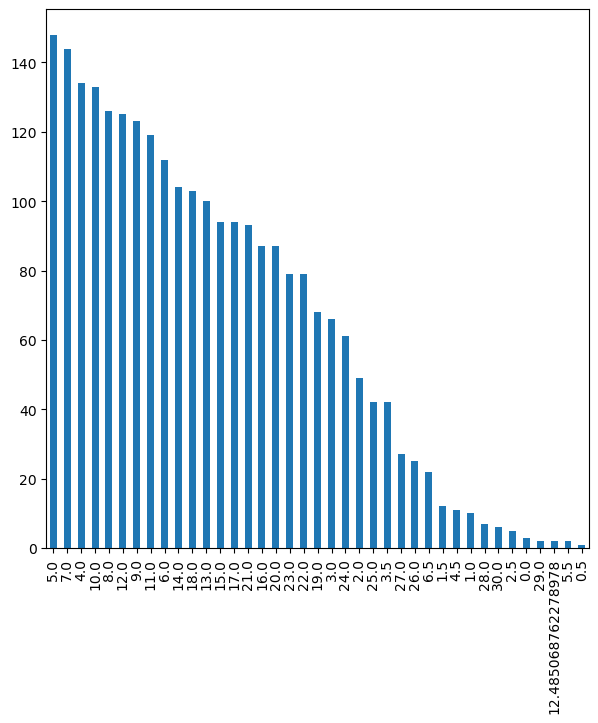

In [11]:
data_set1['Years of Experience'].value_counts().plot(kind="bar", figsize=(7, 7))


<Axes: >

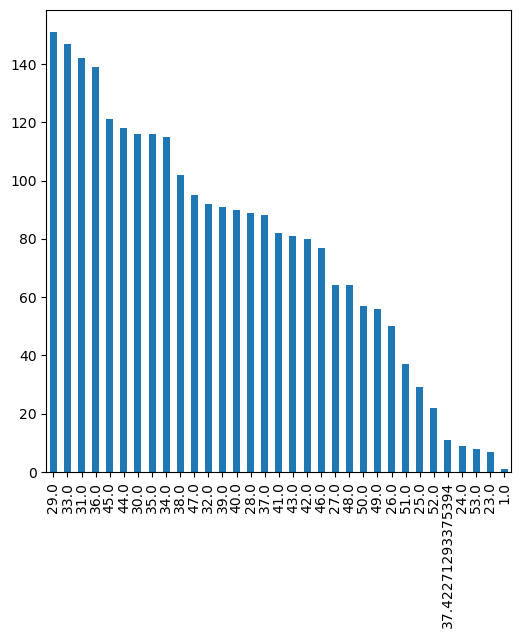

In [10]:
data_set1['Age'].value_counts().plot(kind="bar", figsize=(6, 6))


In [12]:
data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,24.0,Male,Bachelor's,Sales Representative,3.0,30000.0
1,25.0,Female,Bachelor's,Data Entry Clerk,3.0,35000.0
2,25.0,Male,Bachelor's,Help Desk Analyst,3.0,35000.0
3,26.0,Male,Bachelor's,Junior Accountant,4.0,35000.0
4,26.0,Male,Bachelor's,Junior Software Developer,4.0,35000.0


### Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()

data_set1["Gender"]=Label_Encoder.fit_transform(data_set1["Gender"])
data_set1["Education Level"]=Label_Encoder.fit_transform(data_set1["Education Level"])
data_set1["Job Title"]=Label_Encoder.fit_transform(data_set1["Job Title"])
data_set1.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,24.0,1,0,106,3.0,30000.0
1,25.0,0,0,18,3.0,35000.0
2,25.0,1,0,41,3.0,35000.0
3,26.0,1,0,47,4.0,35000.0
4,26.0,1,0,76,4.0,35000.0


### Normalization

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_set1["Age"]=scaler.fit_transform(data_set1[["Age"]])
data_set1["Years of Experience"]=scaler.fit_transform(data_set1[["Years of Experience"]])
data_set1["Job Title"]=scaler.fit_transform(data_set1[["Job Title"]])

data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,-1.873208,1,0,0.318214,-1.389361,30000.0
1,-1.733653,0,0,-1.543624,-1.389361,35000.0
2,-1.733653,1,0,-1.057007,-1.389361,35000.0
3,-1.594098,1,0,-0.930064,-1.242882,35000.0
4,-1.594098,1,0,-0.316503,-1.242882,35000.0


In [15]:
X = data_set1[["Age", "Gender", "Education Level", "Job Title", "Years of Experience"]]
y = data_set1["Salary"]


### Split Dataset

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2,random_state=42)

### Ploynomail Regression Model

In [17]:
poly = PolynomialFeatures(degree=2)  
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [19]:
from sklearn.metrics import r2_score
r2_poly = r2_score(y_test, y_pred_poly)
print("R-squared (Polynomial Regression) is {0:.2f}% :". format( 100*r2_poly))

R-squared (Polynomial Regression) is 84.79% :
